# Data Project 6 - Support Vector Machines

dataset source: https://archive.ics.uci.edu/ml/datasets/Internet+Firewall+Data

## Data Set Information:

There are 12 features in total. Action feature is used as a class. There are 4 classes in total. These are allow, action, drop and reset-both classes.


## Attribute Information:

Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received

Number of instances: 65532 , Number of features: 12, Classification Problem to predict if internet traffic will be allowed to pass through a network firewall. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/internet_firewall.csv")
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [3]:
df.shape

(65532, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [5]:
df.isna().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [6]:
df['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

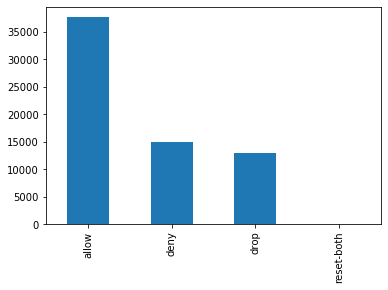

In [7]:
df['Action'].value_counts().plot(kind='bar')

In [8]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


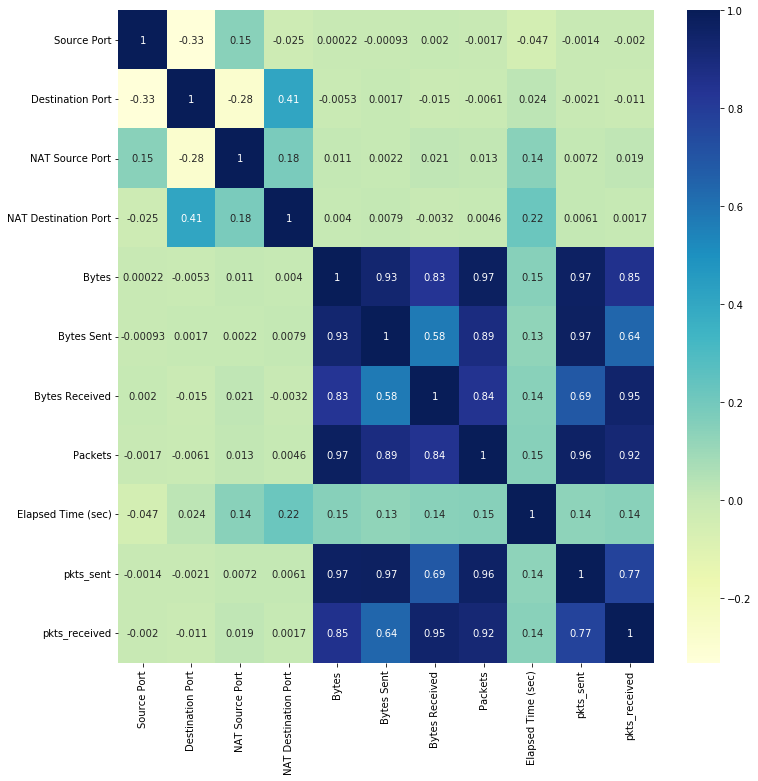

In [10]:
import seaborn as sns
plt.figure(figsize=(12,12))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [11]:
#the output/dependent feature is categorical, convert to numericals

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['Action'] = le.fit_transform(df['Action'])

df['Action']

0        0
1        0
2        0
3        0
4        0
        ..
65527    0
65528    0
65529    2
65530    2
65531    2
Name: Action, Length: 65532, dtype: int32

In [12]:
df['Action'].nunique()

4

In [13]:
#Separate independent/dependent features

X = df.drop(columns=['Action'], axis=1, inplace=False)
y = df['Action']

In [14]:
X

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,177,94,83,2,30,1,1
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,314,192,122,6,15,4,2
65528,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,70,70,0,1,0,1,0
65530,54870,445,0,0,70,70,0,1,0,1,0


In [15]:
y

0        0
1        0
2        0
3        0
4        0
        ..
65527    0
65528    0
65529    2
65530    2
65531    2
Name: Action, Length: 65532, dtype: int32

In [16]:
#split the dataset 80/20, 20% for testing purposes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (52425, 11)
X_test: (13107, 11)
y_train: (52425,)
y_test: (13107,)


In [17]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.00410758, -0.54874891, -0.65779368, ...,  0.03860065,
        -0.008746  , -0.02077207],
       [ 0.75810782, -0.54864056, -0.87840622, ..., -0.2140437 ,
        -0.01182699, -0.02577167],
       [ 0.00410758, -0.56987603,  1.35874068, ..., -0.11687279,
        -0.01126681, -0.02452177],
       ...,
       [-0.88185253, -0.54874891, -0.5945663 , ..., -0.15898018,
        -0.00790573, -0.02077207],
       [ 0.48389612, -0.54874891,  0.21012511, ..., -0.16545824,
        -0.00902609, -0.02202197],
       [ 0.46672101, -0.56987603,  2.08230243, ..., -0.11363376,
        -0.01182699, -0.02535504]])

In [18]:
X_test = scaler.transform(X_test)

In [19]:
#support vector classifier

from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [23]:
y_pred = clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

print('Accuracy on test set:', accuracy_score(y_test, y_pred))

Accuracy on test set: 0.9881742580300603


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7545
           1       0.99      0.96      0.98      2994
           2       0.96      1.00      0.98      2562
           3       0.00      0.00      0.00         6

    accuracy                           0.99     13107
   macro avg       0.74      0.74      0.74     13107
weighted avg       0.99      0.99      0.99     13107



C:\Users\Mia\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mia\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mia\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
